In [1]:
# multivariate output multi-step 1d cnn example
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [47]:
dataset = pd.read_csv('borhci.csv', header=0, index_col=0)
#dataset=dataset.del((:,0))
dataset = dataset.drop((c for c in dataset.columns[-6:]), axis=1)
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# choose a number of time steps
n_steps_in, n_steps_out = 12, 3
# convert into input/output
X_train, y_train = split_sequences(scaled[:-12,:], n_steps_in, n_steps_out)
# flatten output
n_output = y_train.shape[1] * y_train.shape[2]
y_train = y_train.reshape((y_train.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = X_train.shape[2]
test = scaled[-39:,:]
X_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
#X_test = X_test.reshape((1, n_steps_in, n_features))
#y_test = y_test.reshape((1, n_steps_out, n_features))
#y_test = y_test.reshape((y_test.shape[0], n_output))
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
X_train = X_train.reshape((X_train.shape[0],1,n_steps_in,n_features))
X_test = X_test.reshape((25,1,n_steps_in,n_features))
y_test = y_test.reshape((25, n_steps_out, n_features))
y_test = y_test.reshape((y_test.shape[0], n_output))

In [48]:
#print(X_train.shape)
#print(X_test.shape)

Train on 254 samples, validate on 25 samples
Epoch 1/500
 - 2s - loss: 0.4063 - val_loss: 0.2849
Epoch 2/500
 - 0s - loss: 0.3274 - val_loss: 0.2764
Epoch 3/500
 - 0s - loss: 0.3177 - val_loss: 0.2720
Epoch 4/500
 - 0s - loss: 0.3115 - val_loss: 0.2690
Epoch 5/500
 - 0s - loss: 0.3070 - val_loss: 0.2660
Epoch 6/500
 - 0s - loss: 0.3035 - val_loss: 0.2620
Epoch 7/500
 - 0s - loss: 0.3012 - val_loss: 0.2596
Epoch 8/500
 - 0s - loss: 0.2991 - val_loss: 0.2570
Epoch 9/500
 - 0s - loss: 0.2975 - val_loss: 0.2543
Epoch 10/500
 - 0s - loss: 0.2964 - val_loss: 0.2519
Epoch 11/500
 - 0s - loss: 0.2953 - val_loss: 0.2494
Epoch 12/500
 - 0s - loss: 0.2943 - val_loss: 0.2467
Epoch 13/500
 - 0s - loss: 0.2935 - val_loss: 0.2443
Epoch 14/500
 - 0s - loss: 0.2926 - val_loss: 0.2419
Epoch 15/500
 - 0s - loss: 0.2918 - val_loss: 0.2401
Epoch 16/500
 - 0s - loss: 0.2912 - val_loss: 0.2384
Epoch 17/500
 - 0s - loss: 0.2904 - val_loss: 0.2370
Epoch 18/500
 - 0s - loss: 0.2898 - val_loss: 0.2355
Epoch 19/5

Epoch 154/500
 - 0s - loss: 0.2329 - val_loss: 0.2287
Epoch 155/500
 - 0s - loss: 0.2328 - val_loss: 0.2287
Epoch 156/500
 - 0s - loss: 0.2328 - val_loss: 0.2286
Epoch 157/500
 - 0s - loss: 0.2328 - val_loss: 0.2285
Epoch 158/500
 - 0s - loss: 0.2327 - val_loss: 0.2285
Epoch 159/500
 - 0s - loss: 0.2327 - val_loss: 0.2285
Epoch 160/500
 - 0s - loss: 0.2326 - val_loss: 0.2284
Epoch 161/500
 - 0s - loss: 0.2326 - val_loss: 0.2283
Epoch 162/500
 - 0s - loss: 0.2326 - val_loss: 0.2283
Epoch 163/500
 - 0s - loss: 0.2326 - val_loss: 0.2283
Epoch 164/500
 - 0s - loss: 0.2325 - val_loss: 0.2282
Epoch 165/500
 - 0s - loss: 0.2325 - val_loss: 0.2282
Epoch 166/500
 - 0s - loss: 0.2324 - val_loss: 0.2282
Epoch 167/500
 - 0s - loss: 0.2324 - val_loss: 0.2281
Epoch 168/500
 - 0s - loss: 0.2324 - val_loss: 0.2281
Epoch 169/500
 - 0s - loss: 0.2324 - val_loss: 0.2281
Epoch 170/500
 - 0s - loss: 0.2323 - val_loss: 0.2281
Epoch 171/500
 - 0s - loss: 0.2323 - val_loss: 0.2280
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.2290 - val_loss: 0.2264
Epoch 307/500
 - 0s - loss: 0.2290 - val_loss: 0.2264
Epoch 308/500
 - 0s - loss: 0.2289 - val_loss: 0.2263
Epoch 309/500
 - 0s - loss: 0.2289 - val_loss: 0.2263
Epoch 310/500
 - 0s - loss: 0.2289 - val_loss: 0.2263
Epoch 311/500
 - 0s - loss: 0.2289 - val_loss: 0.2263
Epoch 312/500
 - 0s - loss: 0.2289 - val_loss: 0.2262
Epoch 313/500
 - 0s - loss: 0.2288 - val_loss: 0.2263
Epoch 314/500
 - 0s - loss: 0.2288 - val_loss: 0.2263
Epoch 315/500
 - 0s - loss: 0.2288 - val_loss: 0.2263
Epoch 316/500
 - 0s - loss: 0.2288 - val_loss: 0.2262
Epoch 317/500
 - 0s - loss: 0.2287 - val_loss: 0.2262
Epoch 318/500
 - 0s - loss: 0.2287 - val_loss: 0.2262
Epoch 319/500
 - 0s - loss: 0.2287 - val_loss: 0.2262
Epoch 320/500
 - 0s - loss: 0.2287 - val_loss: 0.2261
Epoch 321/500
 - 0s - loss: 0.2287 - val_loss: 0.2262
Epoch 322/500
 - 0s - loss: 0.2286 - val_loss: 0.2261
Epoch 323/500
 - 0s - loss: 0.2286 - val_loss: 0.2260
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.2259 - val_loss: 0.2229
Epoch 459/500
 - 0s - loss: 0.2258 - val_loss: 0.2228
Epoch 460/500
 - 0s - loss: 0.2258 - val_loss: 0.2228
Epoch 461/500
 - 0s - loss: 0.2258 - val_loss: 0.2227
Epoch 462/500
 - 0s - loss: 0.2258 - val_loss: 0.2227
Epoch 463/500
 - 0s - loss: 0.2258 - val_loss: 0.2227
Epoch 464/500
 - 0s - loss: 0.2257 - val_loss: 0.2227
Epoch 465/500
 - 0s - loss: 0.2257 - val_loss: 0.2226
Epoch 466/500
 - 0s - loss: 0.2257 - val_loss: 0.2226
Epoch 467/500
 - 0s - loss: 0.2257 - val_loss: 0.2226
Epoch 468/500
 - 0s - loss: 0.2256 - val_loss: 0.2225
Epoch 469/500
 - 0s - loss: 0.2256 - val_loss: 0.2225
Epoch 470/500
 - 0s - loss: 0.2256 - val_loss: 0.2224
Epoch 471/500
 - 0s - loss: 0.2256 - val_loss: 0.2224
Epoch 472/500
 - 0s - loss: 0.2256 - val_loss: 0.2224
Epoch 473/500
 - 0s - loss: 0.2255 - val_loss: 0.2223
Epoch 474/500
 - 0s - loss: 0.2255 - val_loss: 0.2223
Epoch 475/500
 - 0s - loss: 0.2255 - val_loss: 0.2223
Epoch 476/500
 - 0s - loss: 

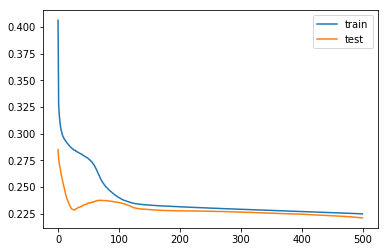

In [49]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=32, kernel_size=10, activation='relu',input_shape=(n_steps_in, n_features))))
model.add(TimeDistributed(MaxPooling1D(pool_size=3)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(120, activation='softmax', input_shape=(n_steps_in, n_features)))
model.add(Dense(150,activation='relu'))
model.add(Dense(n_output,activation='relu'))
model.compile(optimizer='adagrad', loss='mae')
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test, y_test),verbose=2,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [50]:
yhat = model.predict(X_test)
n_yhat = yhat.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_yhat = scaler.inverse_transform(n_yhat)
inv_yhat = inv_yhat[:,4:7]
y_test = y_test.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_y = scaler.inverse_transform(y_test)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 694.340


In [51]:
i=0
ninhat=[]
x_input = scaled[-12:,:]
x_input = x_input.reshape((1,1, n_steps_in, n_features))
nx_input = x_input
while i < 8:
    nyhat = model.predict(nx_input)
    #print(nyhat)
    nx_input = nx_input.reshape((n_steps_in, n_features))
    nyhat = nyhat.reshape((n_steps_out, n_features))
    nx_input = np.append(nx_input[3:,:],nyhat)
    nx_input = nx_input.reshape((1,1, n_steps_in, n_features))
    ninhat = np.append(ninhat,nyhat)
    i = i+1

In [52]:
print(nx_input.shape)
print(nyhat.shape)
print(ninhat.shape)

(1, 1, 12, 8)
(3, 8)
(192,)


In [53]:
ninhat = ninhat.reshape((24, n_features))
ninhat = scaler.inverse_transform(ninhat)
print(ninhat.shape)

(24, 8)


In [54]:
print(ninhat[:,4:7])

[[3.11595223e+02 0.00000000e+00 1.42341989e+03]
 [2.92811485e+02 2.85615704e-01 1.33494625e+03]
 [0.00000000e+00 0.00000000e+00 1.31334697e+03]
 [3.63722405e+02 0.00000000e+00 1.70517698e+03]
 [3.51614339e+02 3.57098968e-01 1.63971253e+03]
 [0.00000000e+00 0.00000000e+00 1.61348807e+03]
 [4.09696168e+02 0.00000000e+00 1.93705106e+03]
 [4.04137690e+02 3.99572738e-01 1.90295318e+03]
 [0.00000000e+00 0.00000000e+00 1.86380824e+03]
 [4.17048943e+02 0.00000000e+00 1.96859232e+03]
 [4.12783039e+02 4.01829160e-01 1.93982004e+03]
 [0.00000000e+00 0.00000000e+00 1.90085970e+03]
 [4.20533108e+02 0.00000000e+00 1.98300001e+03]
 [4.16736268e+02 4.02173620e-01 1.95589667e+03]
 [0.00000000e+00 0.00000000e+00 1.91720363e+03]
 [4.18906973e+02 0.00000000e+00 1.97655866e+03]
 [4.14932500e+02 4.02586627e-01 1.94903915e+03]
 [0.00000000e+00 0.00000000e+00 1.91018745e+03]
 [4.18402076e+02 0.00000000e+00 1.97418807e+03]
 [4.14337148e+02 4.02242777e-01 1.94634164e+03]
 [0.00000000e+00 0.00000000e+00 1.907533

In [55]:
#print(nx_input[0,2] ,nx_input[0,5])

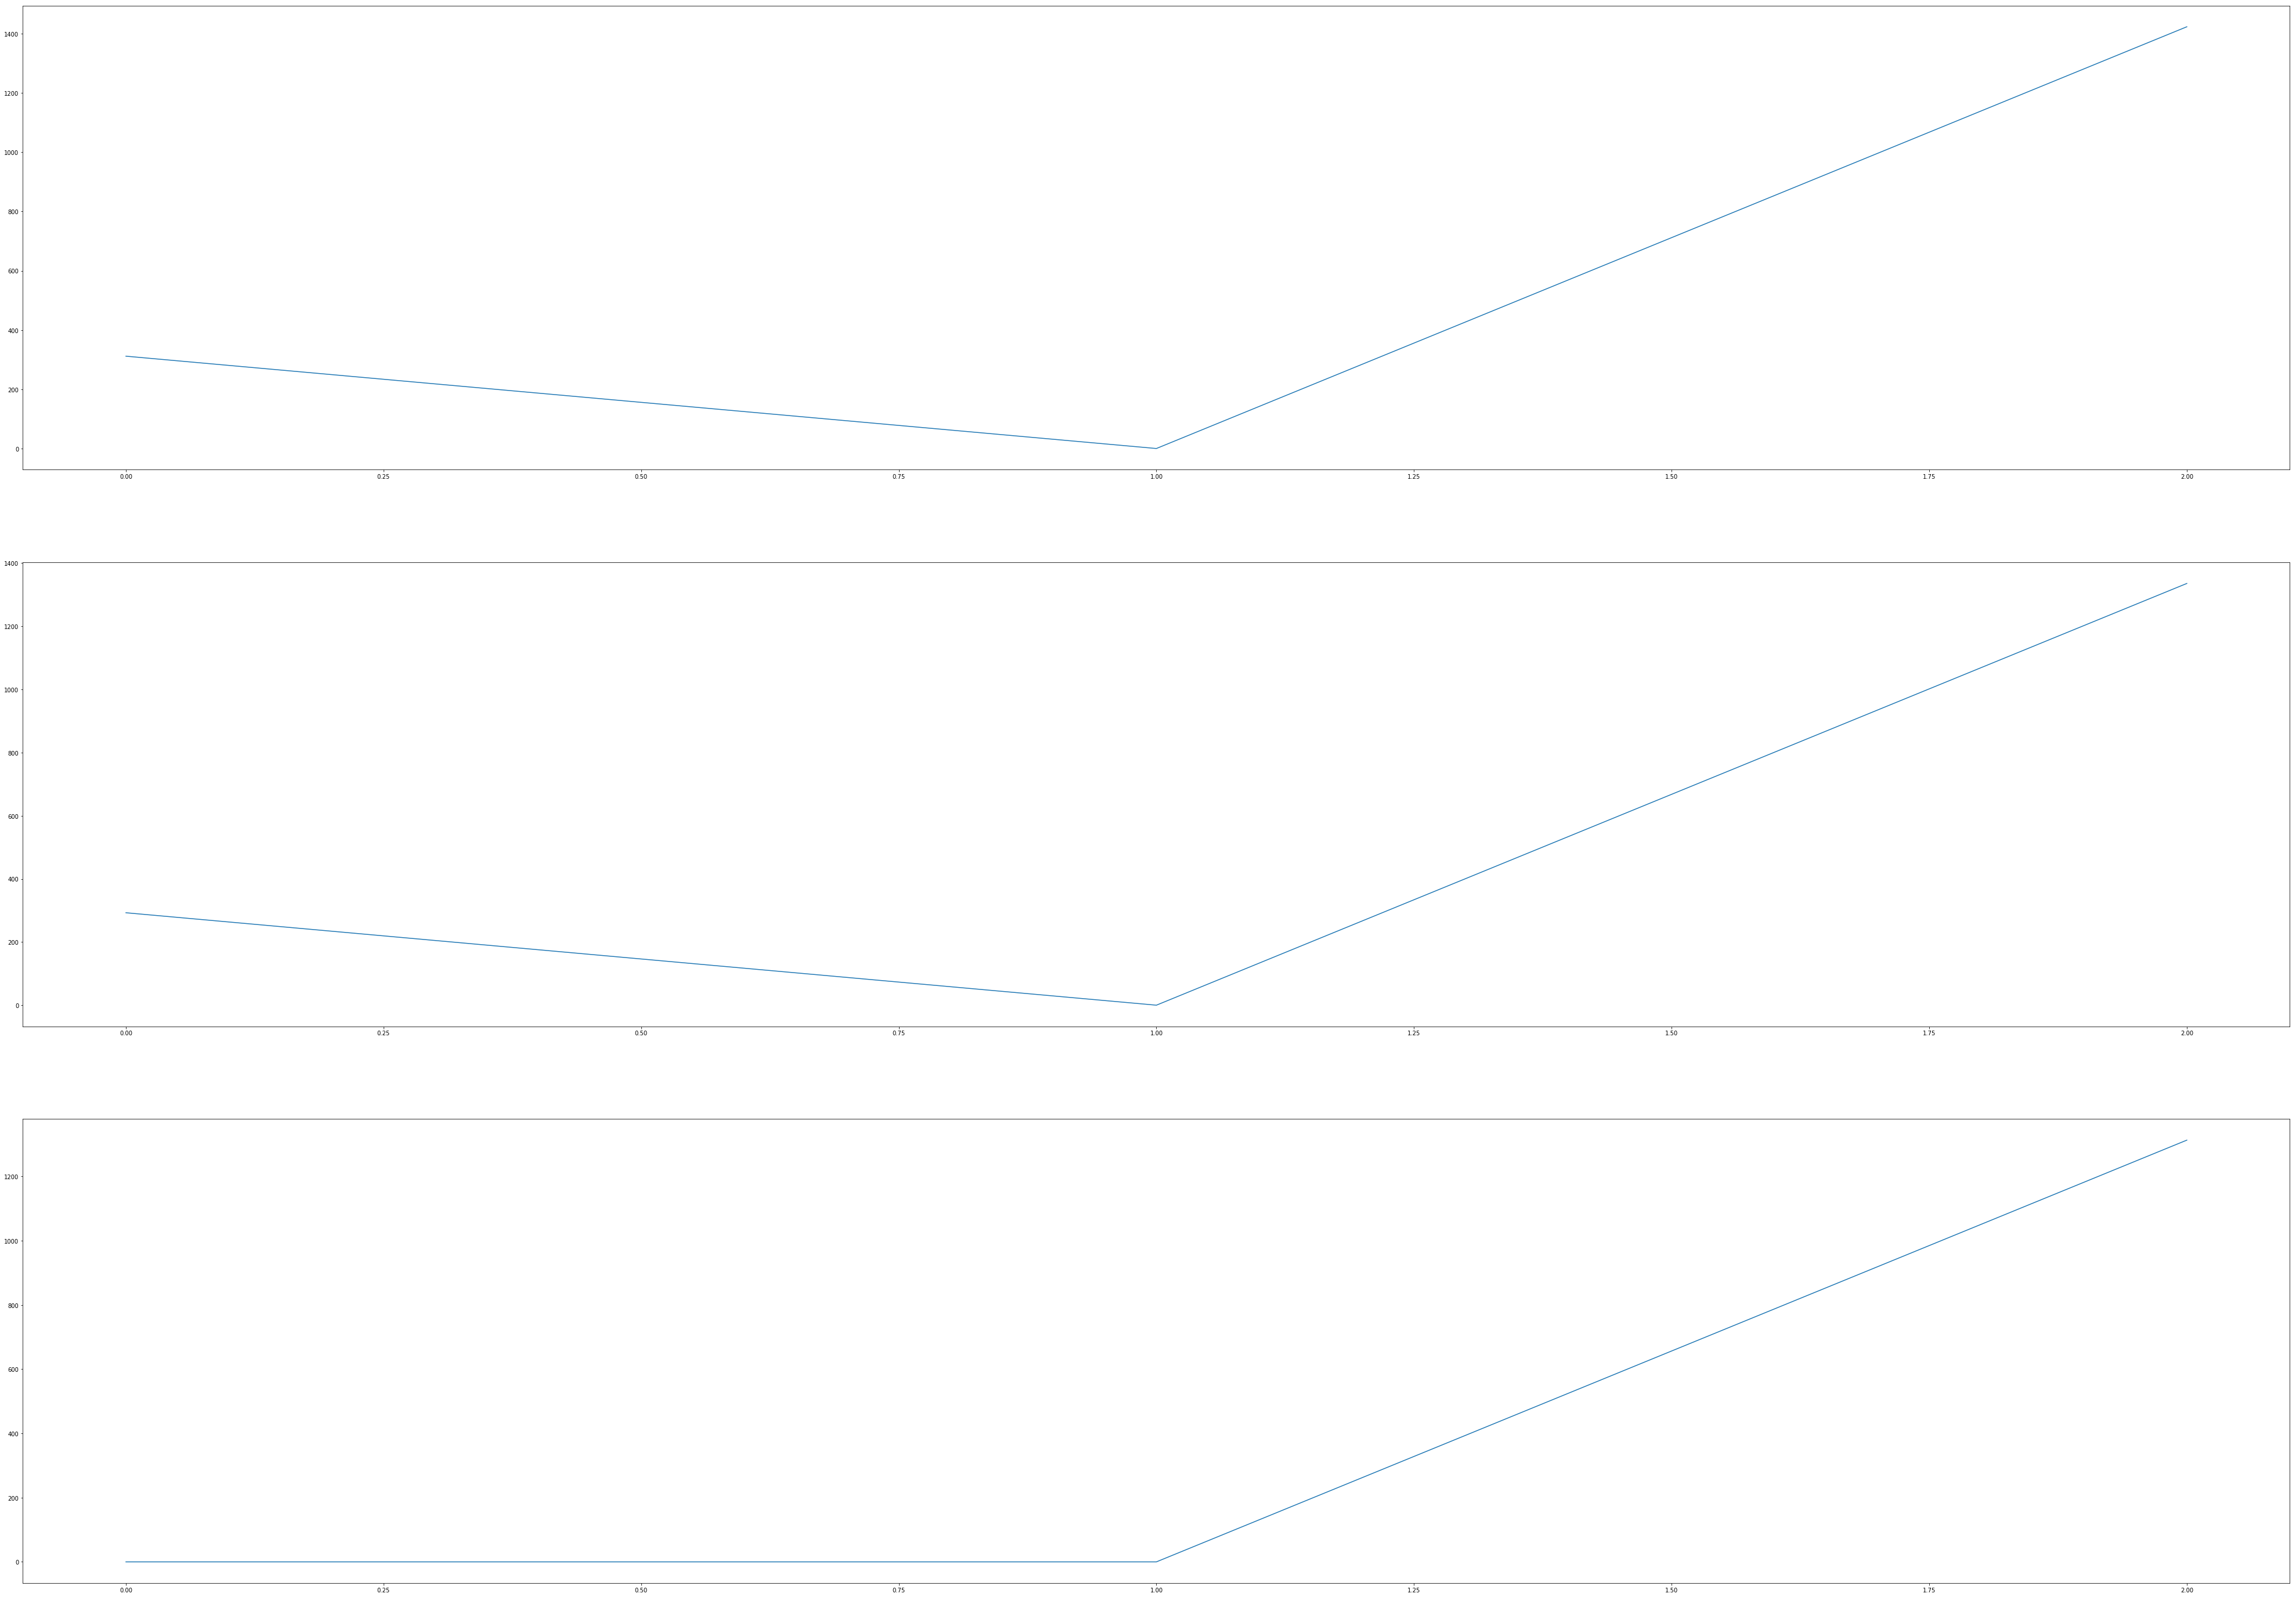

In [56]:
groups = [0,1,2]
i = 1
# plot each column
plt.figure(figsize=(70,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(ninhat[group, 4:7])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [57]:
new = dataset

In [58]:
new.shape

(280, 8)

In [59]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [60]:
new.index

Index(['01/09/1991', '01/10/1991', '01/11/1991', '01/12/1991', '01/01/1992',
       '01/02/1992', '01/03/1992', '01/04/1992', '01/05/1992', '01/06/1992',
       ...
       '01/03/2014', '01/04/2014', '01/05/2014', '01/06/2014', '01/07/2014',
       '01/08/2014', '01/09/2014', '01/10/2014', '01/11/2014', '01/12/2014'],
      dtype='object', name='Date', length=280)

In [61]:
nin=new.index[-1]
print(nin)

01/12/2014


In [62]:
newxhat= pd.DataFrame(ninhat,columns=[c for c in new.columns] )

In [63]:
newxhat.shape

(24, 8)

In [64]:
new=new.append(newxhat)
new.shape

(304, 8)

In [65]:
new.head(4)

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
01/09/1991,672.0,18.0,11.3,148.407080,362.908461,0.0,408.938053,0.0
01/10/1991,1087.0,18.0,29.0,403.517241,513.944398,0.0,785.137931,0.0
01/11/1991,928.0,23.0,29.8,505.671141,380.992112,0.0,1327.248322,0.0
01/12/1991,863.0,26.0,25.2,742.777778,371.964548,0.0,1996.904762,0.0


In [68]:
newbori = new.to_csv('newbori4.csv')